### Prisoner's dilemma using Axelrod library

In [ ]:
import axelrod as axl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

Analysing: 100%|██████████| 25/25 [00:00<00:00, 228.22it/s]


AXELROD LIBRARY TOURNAMENT RESULTS
Tournament: 100 rounds per game, 5 repetitions
1. Defector                       Total Score:   5168
2. Grudger                        Total Score:   5018
3. Tit For Tat                    Total Score:   4594
4. Cooperator                     Total Score:   3777
5. Random: 0.5                    Total Score:   3592

COOPERATION RATES
Cooperator                     Avg Cooperation Rate: 50000.00%
Defector                       Avg Cooperation Rate: 0.00%
Tit For Tat                    Avg Cooperation Rate: 35000.00%
Grudger                        Avg Cooperation Rate: 30320.00%
Random: 0.5                    Avg Cooperation Rate: 25980.00%


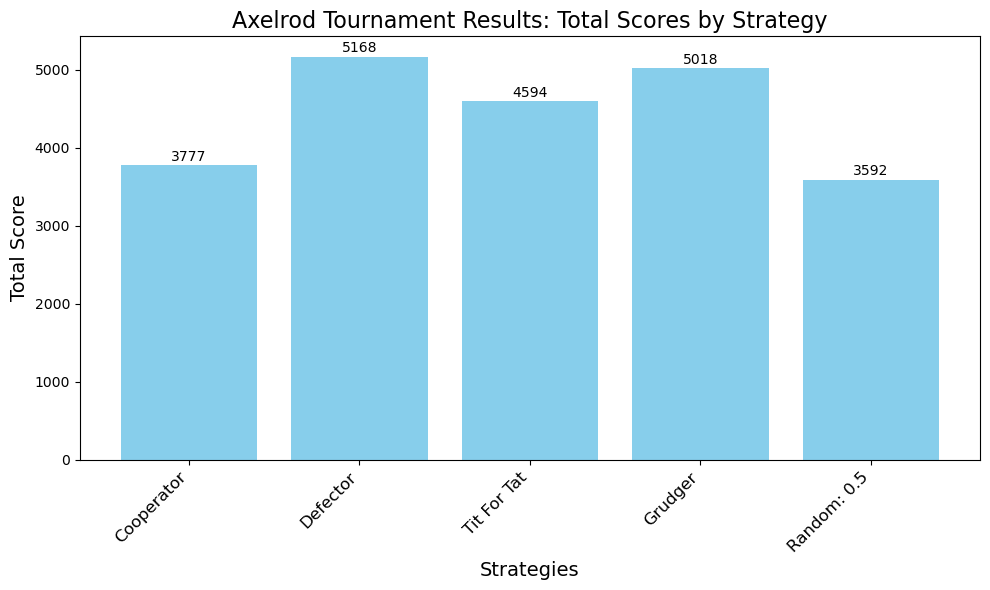

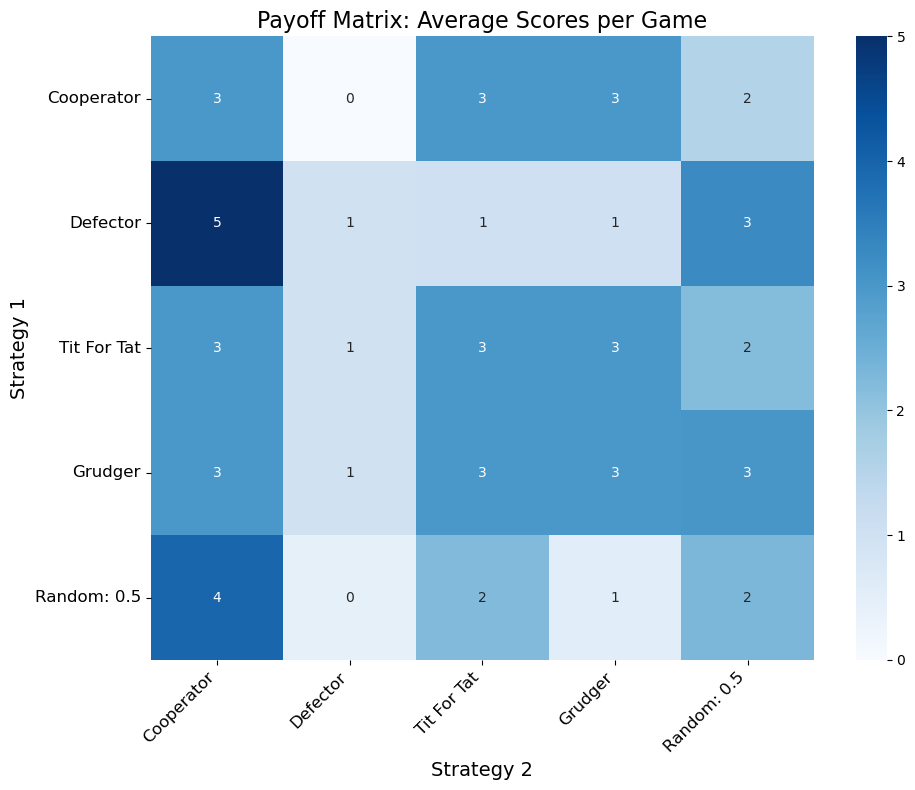


COMPARISON WITH GAME THEORY EXPECTATIONS
Expected patterns:
• Tit For Tat should perform well overall
• Grudger should perform similarly to Tit For Tat
• Defector should exploit Cooperator but struggle against retaliatory strategies
• Cooperator should be exploited by defecting strategies
• Random should perform moderately

Cooperation sustainability:
• Tit For Tat vs Tit For Tat: High cooperation
• Tit For Tat vs Grudger: High cooperation
• Tit For Tat vs Cooperator: Perfect cooperation
• Any strategy vs Defector: No cooperation

DETAILED MATCHUP ANALYSIS
Matchup                                  Avg Score 1  Avg Score 2  Cooperation
----------------------------------------------------------------------------
Cooperator vs Cooperator                3.0          (self-play)    50000.00%
Cooperator vs Defector                  0.0          5.0          50000.00%
Cooperator vs Tit For Tat               3.0          3.0          50000.00%
Cooperator vs Grudger                   3.0       

In [ ]:
def run_axelrod_tournament():
    # Create the same strategies as in your scratch notebook
    strategies = [
        axl.Cooperator(),        # AlwaysCooperate
        axl.Defector(),          # AlwaysDefect  
        axl.TitForTat(),         # TitForTat
        axl.Grudger(),           # GrimTrigger
        axl.Random()             # Random
    ]
    
    # Set up tournament with same parameters
    tournament = axl.Tournament(strategies, turns=100, repetitions=5)
    results = tournament.play()
    
    # Display results
    print("AXELROD LIBRARY TOURNAMENT RESULTS")
    print("=" * 60)
    print(f"Tournament: 100 rounds per game, 5 repetitions")
    print("=" * 60)
    
    # Get total scores
    total_scores = [sum(scores) for scores in results.scores]
    strategy_names = [str(s) for s in strategies]
    
    # Create ranking
    ranked_results = list(zip(strategy_names, total_scores))
    ranked_results.sort(key=lambda x: x[1], reverse=True)
    
    for rank, (strategy, score) in enumerate(ranked_results, 1):
        print(f"{rank}. {strategy:30s} Total Score: {score:6.0f}")
    
    # Cooperation analysis - fixed
    print("\nCOOPERATION RATES")
    print("=" * 60)
    
    # Calculate average cooperation rate for each strategy
    cooperation_matrix = results.cooperation
    for i, strategy in enumerate(strategy_names):
        # Average cooperation rate across all opponents
        avg_cooperation = np.mean([cooperation_matrix[i][j] for j in range(len(strategies))])
        print(f"{strategy:30s} Avg Cooperation Rate: {avg_cooperation:.2%}")
    
    # Visualizations
    create_visualizations(results, strategies)
    
    return results, strategies

def create_visualizations(results, strategies):
    strategy_names = [str(s) for s in strategies]
    total_scores = [sum(scores) for scores in results.scores]
    
    # 1. Bar chart of total scores
    plt.figure(figsize=(10, 6))
    bars = plt.bar(strategy_names, total_scores, color='skyblue')
    plt.title("Axelrod Tournament Results: Total Scores by Strategy", fontsize=16)
    plt.xlabel("Strategies", fontsize=14)
    plt.ylabel("Total Score", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    
    # Add value labels on bars
    for bar, score in zip(bars, total_scores):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 20,
                f'{int(score)}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Payoff matrix heatmap
    payoff_matrix = results.payoff_matrix
    
    plt.figure(figsize=(10, 8))
    import seaborn as sns
    
    # Create DataFrame for better labeling
    payoff_df = pd.DataFrame(payoff_matrix, 
                           index=strategy_names, 
                           columns=strategy_names)
    
    sns.heatmap(payoff_df, annot=True, fmt='.0f', cmap="Blues", cbar=True)
    plt.title("Payoff Matrix: Average Scores per Game", fontsize=16)
    plt.xlabel("Strategy 2", fontsize=14)
    plt.ylabel("Strategy 1", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout()
    plt.show()

def compare_with_scratch_results():
    """
    Compare with expected results from your scratch implementation
    """
    print("\nCOMPARISON WITH GAME THEORY EXPECTATIONS")
    print("=" * 60)
    print("Expected patterns:")
    print("• Tit For Tat should perform well overall")
    print("• Grudger should perform similarly to Tit For Tat") 
    print("• Defector should exploit Cooperator but struggle against retaliatory strategies")
    print("• Cooperator should be exploited by defecting strategies")
    print("• Random should perform moderately")
    print("\nCooperation sustainability:")
    print("• Tit For Tat vs Tit For Tat: High cooperation")
    print("• Tit For Tat vs Grudger: High cooperation")
    print("• Tit For Tat vs Cooperator: Perfect cooperation")
    print("• Any strategy vs Defector: No cooperation")

# Run the tournament
results, strategies = run_axelrod_tournament()

# Show comparison
compare_with_scratch_results()

# Additional detailed analysis
def detailed_matchup_analysis(results, strategies):
    print("\nDETAILED MATCHUP ANALYSIS")
    print("=" * 60)
    
    strategy_names = [str(s) for s in strategies]
    payoff_matrix = results.payoff_matrix
    cooperation_matrix = results.cooperation
    
    print(f"{'Matchup':<40} {'Avg Score 1':<12} {'Avg Score 2':<12} {'Cooperation'}")
    print("-" * 76)
    
    for i in range(len(strategies)):
        for j in range(i, len(strategies)):
            s1_name = strategy_names[i]
            s2_name = strategy_names[j]
            s1_score = payoff_matrix[i][j]
            s2_score = payoff_matrix[j][i]
            coop_rate = cooperation_matrix[i][j]
            
            if i == j:
                print(f"{s1_name} vs {s2_name:<25} {s1_score:<12.1f} (self-play)    {coop_rate:.2%}")
            else:
                print(f"{s1_name} vs {s2_name:<25} {s1_score:<12.1f} {s2_score:<12.1f} {coop_rate:.2%}")

detailed_matchup_analysis(results, strategies)